In [1]:
from calculations_utils import *
from plot_utils import *
import datetime

# Check of consistency with Luis paper

In [2]:
distances = np.logspace(0,3,100)
omega = 2*np.pi*c*10**6/30
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz1 = []
Px1 = []
Py1 = []
for d in distances:
    Pz1.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px1.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py1.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [3]:
omega = 2*np.pi*c*10**6/10
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz2 = []
Px2 = []
Py2 = []
for d in distances:
    Pz2.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px2.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py2.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [4]:
omega = 2*np.pi*c*10**6/6
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz3 = []
Px3 = []
Py3 = []
for d in distances:
    Pz3.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px3.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py3.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [5]:
omega = 2*np.pi*c*10**6/1.5
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz4 = []
Px4 = []
Py4 = []
for d in distances:
    Pz4.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px4.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py4.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

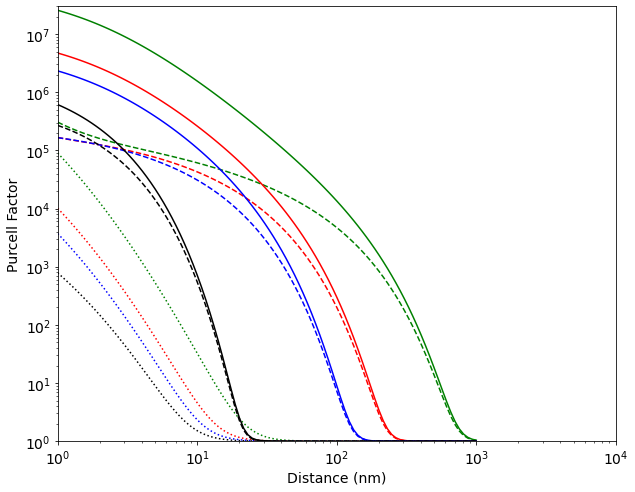

In [6]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 14})

plt.loglog(distances,Pz1,color='green',linestyle='dashed')
plt.loglog(distances,Px1,color='green',linestyle='solid')
plt.loglog(distances,Py1,color='green',linestyle='dotted')

plt.loglog(distances,Pz2,color='red',linestyle='dashed')
plt.loglog(distances,Px2,color='red',linestyle='solid')
plt.loglog(distances,Py2,color='red',linestyle='dotted')

plt.loglog(distances,Pz3,color='blue',linestyle='dashed')
plt.loglog(distances,Px3,color='blue',linestyle='solid')
plt.loglog(distances,Py3,color='blue',linestyle='dotted')

plt.loglog(distances,Pz4,color='black',linestyle='dashed')
plt.loglog(distances,Px4,color='black',linestyle='solid')
plt.loglog(distances,Py4,color='black',linestyle='dotted')

plt.xlabel('Distance (nm)')
plt.ylabel('Purcell Factor')
plt.xlim([1,10000])
plt.ylim([1,3*10**7])
plt.show()

# TPSE spectral densities (CNTs)

In [7]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mu_ev_array = np.array([0.25,0.5,0.75,1])
T = 300
R = 2*10**(-9)
d = R + 10*10**(-9)
m_max = 5

In [8]:
gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for mu_ev in mu_ev_array:
    gamma_mu = []
    for step in omega_steps:
        gamma_mu.append(gamma(omega_0, omega_0*step, mu_ev*e, tau_g(10**4,mu_ev*e), T, R, d, m_max))
    gammas.append(gamma_mu)

c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:90: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(integrand, 0, 10/R)


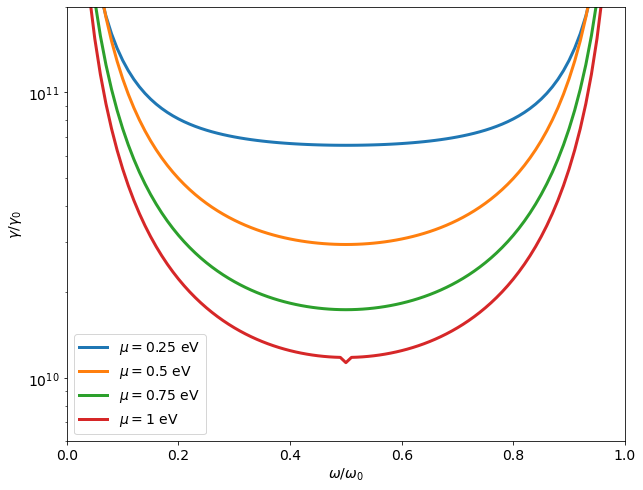

In [33]:
plt.plot(np.linspace(0.01,0.99,99),gammas[0][:-1] + gammas[0][::-1], label='$\mu = 0.25$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[1][:-1] + gammas[1][::-1], label='$\mu = 0.5$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[2][:-1] + gammas[2][::-1], label='$\mu = 0.75$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[3][:-1] + gammas[3][::-1], label='$\mu = 1$ eV', linewidth=3)

plt.xlim([0,1])
plt.ylim([6*10**9,2*10**11])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

# TPSE spectral densities (Graphene coated wire)

In [2]:
lambda_0 = 1.875*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mu_ev_array = np.array([0.2, 0.4, 0.6])
T = 300
R = 10*10**(-9)
d = R + 10*10**(-9)
m_max = 10

In [3]:
gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for mu_ev in mu_ev_array:
    gamma_mu = []
    for step in omega_steps:
        gamma_mu.append(gamma(omega_0, omega_0*step, mu_ev*e, tau_g(10**4,mu_ev*e), T, R, d, m_max))
    gammas.append(gamma_mu)

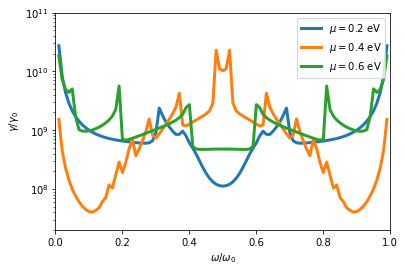

In [4]:
plt.plot(np.linspace(0.01,0.99,99),gammas[0][:-1] + gammas[0][::-1], label='$\mu = 0.2$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[1][:-1] + gammas[1][::-1], label='$\mu = 0.4$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[2][:-1] + gammas[2][::-1], label='$\mu = 0.6$ eV', linewidth=3)

plt.xlim([0,1])
plt.ylim([2*10**7,10*10**10])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

# TPSE rate an quantum efficiencies (CNTs)

# TPSE rate and quantum efficiencies (Graphene coated wire)

In [2]:
ne = 2
ng = 1
d_matrix = []
dne = []
dng = []

for m in range(2,11):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

In [3]:
omegaCut = 0.0000044*e/hbar
Gamma_0(d_matrix, 2, 1, 10, omegaCut)

10.144138013085362

In [4]:
ne = 5
ng = 4
d_matrix = []
dne = []
dng = []

for m in range(2,11):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

In [5]:
before = datetime.datetime.now()
print(Gamma_0(d_matrix, 5, 4, 10, omegaCut))
after = datetime.datetime.now()
print(after - before)

0.0003022625313621322
0:00:00.002000


In [6]:
T = 300
R = 2*10**(-9)
distance = R + 10*10**(-9)
m_max = 10
Gamma(d_matrix,5, 4, e, tau_g(10**4,e), T, R, distance, m_max, 10, omegaCut)

passing
passing
passing
passing
passing
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(integrand, 0, 10/R)
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing


13100194.68136535

In [9]:
(domega(5,4)**2*6*10**-23)/0.0003

43261866186.2444

In [7]:
13100194.68136535/0.0003

43667315604.55117